In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Different combinations of $(X, Y)$ to evaluate the approximation methods

In [130]:
X = np.random.normal(0, 1, 3500)

#X = np.random.exponential(size=100)[:, None]
#X = np.random.chisquare(1, size=20)[:, None]
#X = preprocessing.scale(np.random.uniform(-4, 4, size=1000))
#X = np.random.randn(1000)[:, None]
#Y = (np.random.randn(1000)+0)[:, None]
Y = X**3

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,   4.,   2.,   3.,
          4.,   5.,   6.,  12.,   8.,   8.,   7.,  10.,  13.,  16.,  26.,
         28.,  24.,  24.,  41.,  32.,  38.,  51.,  55.,  38.,  72.,  70.,
         75.,  85.,  81.,  84.,  94., 103.,  78., 105., 103., 103., 109.,
        110., 109., 101.,  77.,  94.,  89.,  82.,  94.,  92.,  96.,  75.,
         70.,  83.,  57.,  73.,  74.,  68.,  53.,  58.,  46.,  27.,  40.,
         38.,  24.,  24.,  15.,  17.,  20.,  13.,  14.,  11.,   8.,   2.,
          5.,   8.,   3.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-3.38997624, -3.31515877, -3.2403413 , -3.16552383, -3.09070636,
        -3.01588889, -2.94107142, -2.86625395, -2.79143648, -2.71661901,
        -2.64180154, -2.56698407, -2.4921666 , -2.41734913, -2.34253166,
        -2.26771419, -2.19289672, -2.11807925, -2.04326178, -1.96844431,
        -1.89362684, -1.81

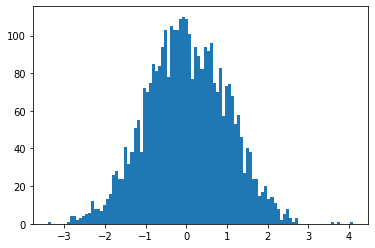

In [131]:
plt.hist(X, bins=100)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        8.000e+00, 1.000e+01, 7.000e+00, 1.000e+01, 1.200e+01, 1.400e+01,
        2.600e+01, 4.600e+01, 4.600e+01, 8.500e+01, 1.480e+02, 4.620e+02,
        1.937e+03, 2.730e+02, 1.250e+02, 7.200e+01, 5.400e+01, 2.600e+01,
        2.200e+01, 2.700e+01, 1.100e+01, 1.500e+01, 8.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

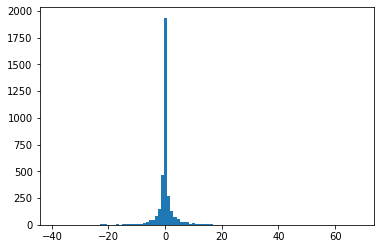

In [132]:
plt.hist(Y, bins=100)

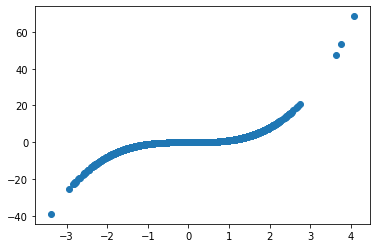

In [133]:
plt.scatter(X, Y)

Show quickly the distributions.

In [134]:
print('X:')
print(X.mean())
print(X.std())
print('-----------------------')
print('Y:')
print(Y.mean())
print(Y.std())

X:
0.012565194466833022
0.9886925547359631
-----------------------
Y:
0.03686842334859394
3.6489586160357983


### Auxiliary functions

In [135]:
def H(X):
    m = X.shape[0]
    return np.identity(m) - (1/m) * (np.ones((m, m)))

# aggregate two samples
def agg_sample(X,Y):
    return np.array(list(X) + list(Y)).reshape(-1, 1)

# compute median
def median(X,Y):   
    distances = metrics.pairwise_distances(agg_sample(X,Y))    # distances in m x m matrix
    return np.median(distances)

# Gaussian kernel
def k(X, Y):
    sigma = median(X,Y)
    return metrics.pairwise.rbf_kernel(X.reshape(-1, 1), Y.reshape(-1, 1), gamma=1/(sigma**2))

In [136]:
median(X,Y)

1.0171915341161666

# Biased MMD

First, we compute the biased MMD to have a measure how different the two distributions $P_X$ and $P_Y$ are in the RKHS.

In [137]:
# biased MMD estimator
def MMD_b(X,Y):
    Kx = k(X,X)
    Ky = k(Y,Y)
    m = X.shape[0]
    return (1/m**2) * np.trace(Kx @ H(X) @ Ky @ H(X))

In [138]:
MMD_b(X, Y)

0.05491151655608356

# Unbiased MMD
Next, we compute the MMD with bias correction.

In [139]:
# unbiased MMD estimator
def MMD_u(X,Y):
    m = X.shape[0]
    return np.sqrt( 1/(m*(m-1)) * (np.matrix(k(X,X)).sum() + np.matrix(k(Y,Y)).sum() - 2 * np.matrix(k(X,Y)).sum()))

In [140]:
MMD_u(X, Y)

0.190616103397236

# HSIC with Gamma approximation

$\mathcal{H}_0 : P_{XY} = P_X P_Y$ is a complex distribution and must be approximated. Here, we approximate it by a Gamma distribution with parameters $\alpha$ (`al`) and $\beta$ (`beta`).

In [141]:
from scipy.stats import gamma

In [142]:
def HSIC_gamma(X,Y,alpha):
    
    Kx = k(X,X)
    Ky = k(Y,Y)
    
    m = X.shape[0]
    
    # c for centred Gram matrices
    Kx_c = H(X) @ Kx @ H(X)    
    Ky_c = H(X) @ Ky @ H(X)
    
    # test statistic
    stat = (1/m) * (Kx_c.T @ Ky_c).sum()
    
    mX = 1/(m*(m-1)) * (np.ones((m,1)).T @ Kx @ np.ones((m,1)))
    mY = 1/(m*(m-1)) * (np.ones((m,1)).T @ Ky @ np.ones((m,1)))
    
    varHSIC = (1/6 * (Kx_c.T @ Ky_c))**2
    varHSIC = 1/(m*(m-1)) * (np.sum(varHSIC) - np.trace(varHSIC))
    varHSIC = varHSIC * 72 * (m-4) * (m-5) / (m*(m-1)*(m-2)*(m-3))
    
    mHSIC = 1/m * (1 + mX * mY - mX - mY)
    
    # Gamma distribution parameters
    al = mHSIC**2 / varHSIC
    beta = m*varHSIC / mHSIC
    
    # 1-alpha threshold
    threshold = gamma.ppf(1-alpha, al, scale=beta)[0][0]
    
    if stat > threshold:
        print('H0 rejected')
    else:
        print('H0 accepted')
    
    return (stat, threshold)

In [143]:
# test level alpha = 0.05
print('p-value, test threshold:', HSIC_gamma(X,Y,0.05))

H0 rejected
p-value, test threshold: (1.117379205035312e-14, 0.0)


# dHSIC
$\mathcal{H}_0 : P_{\boldsymbol{X}} = P_{X_1} P_{X_2} P_{X_3} ... P_{X_d} $ must also be approximated.

In [87]:
# generate 50 random variables with m measurements each
X = np.random.randn(10000).reshape(50,-1)

In [ ]:
def dHSIC(X):
    K = {}
    
    # number of random variables d and measurements m
    d, m = X.shape
    
    for j in range(d):
        K[j] = metrics.pairwise.rbf_kernel(X[j].reshape(-1,1))    # m x m matrix

    term1 = np.ones((m,m))
    term2 = 1
    term3 = np.full((1,m), 2/m)

    for j in range(d):
        term1 = term1 @ K[j]
        term2 = 1/(m**2) * term2 * K[j].sum()
        term3 = 1/m * term3 * K[j].sum(axis=0)
    
    return 1/(m**2) * term1.sum() + term2 - term3.sum()

In [ ]:
# joint independence between 50 random normal distributions with m measurements each
dHSIC(X)